# Linear regression
Suppose there are $m$ data points, each with $n$ predictors (known features) and $t$ targets (unknown features in the test set).

Store the predictors in the matrix $X$, which is an $m \times n$ matrix, with each row corresponding to one data point.

Store the targets in the matrix $Y$, which is an $m \times t$ matrix, corresponding to $X$ (i.e., the rows of $X$ and $Y$ are one-to-one mapped).

In the lecture, we only consider a single target variable. Here $Y$ consists of $t$ target variables. The closed form solution is the same as we had derived in this [video](https://oakland.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=01a9d556-4e95-4079-b028-ad980025411a).

Mathematically, linear regression solves this optimization problem:

Given $X$ and $Y$, find the best $W$ and $b$ such that

$$Y \approx XW + b$$

Linear regression then solves this optimization problem:

$$W^*, b^* = \underset{W, b}{\operatorname{argmin}} ||Y - (XW + b)||^{2}$$

Here, $W$ is a $n \times t$ weight matrix, $b$ is a bias vector of length $t$.

Now let's use a trick to absort $b$ into $W$.

Let $X_{extend}=[X, \bf{1}]$, i.e., append a column of 1 to the last column of $X$. Here $\bf{1}$$=[1,1,\cdots,1]^T$ is  a column vector of length $m$ with every element being 1.


\begin{equation*}
W_{extend} =
\begin{bmatrix}
W \\
b
\end{bmatrix}
\end{equation*}

Now $W^*_{extend}$ is a $(n+1) \times t$ matrix, with the first $n$ row corresponding to $W^*$ and the last row $b^*$.

For your information, the closed form solution with linear regression is

$$W^*_{extend}=(X^{T}_{extend}X_{extend})^{-1}X^{T}_{extend}Y$$

You can then read out $W^*, b^*$ directly from $W^*_{extend}$

In [2]:
import numpy as np

import matplotlib.pyplot as plt

In [3]:
from numpy.ma.core import take
def linear_regression_params(X, Y):
    """Given a set of data points stored in X and Y, find the best weight matrix and bias

    Arguments:
        X: 2D numpy array with shape (num_points, num_features)
        Y: 2D numpy array with shape (num_points, num_targets)

    Returns:
        W: 2D numpy array with shape (num_features, num_targets)
        b: b is a 1D numpy array with shape (num_targets,)
    """
    W = None
    b = None
    ################################################################################
    ######################### Write your code in this block (20 points) ############
    ## 20 points ##
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


    # Find size of arrays for manipulation later on m , n , t
    m , n = X.shape
    m , t = Y.shape
    # Vector for bayers term
    one_vector = np.ones(shape = (m,1))


    # Create the transpose of Array X
    X_transpose = np.transpose(X)


    # Create the Array X_extend, X_transpose_extend, and Y_extend
    X_extend = np.append(X, one_vector, axis = 1)
    X_transpose_extend = np.matrix.transpose(X_extend)
    Y_extend = np.append(Y, one_vector, axis = 1)


    # Multiple
    X_temp = np.matmul(X_transpose_extend, X_extend)
    X_temp = np.linalg.inv(X_temp)
    X_temp = np.matmul(X_temp, X_transpose_extend)
    X_temp = np.matmul(X_temp, Y)

    W = X_temp[0:n,:]
    b = X_temp[n,:]
    print(X_temp,W , b,m,n,t)




    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return W, b


def linear_regression_predict(W, b, X_test):
    """Given weight matrix W and bias vector b (b can be None), predict the target matrix for X_test

    Arguments:
        W: 2D numpy array with shape (num_features, num_targets)
        b: b can be a 1D numpy array with shape (num_targets,) or b is None
        X_test: 2D numpy array with shape (num_points, num_features)

    Returns:
        Y_test: 2D numpy array with shape (num_points, num_targets)

    """
    Y_test = None
    ################################################################################
    ######################### Write your code in this block (5 points) #############
    ## 5 points ##
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    print(np.shape(X_test), np.shape(W))
    Y_test = np.matmul(X_test, W)
    Y_test = Y_test + b


    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return Y_test

# Evaluate your implementation
After you have implemented the above two functions: linear_regression_params and linear_regression_predict
Use the following code to evaluate your implementation.

In [4]:
def generate_evaluation_data(num_features, num_targets, noise_level=1):
    w_true = np.random.uniform(-5, 5, (num_features, num_targets))
    b_true = np.random.uniform(-10, 10, (num_targets,))

    x_train = np.random.uniform(1, 10, (100, num_features))
    y_train = x_train.dot(w_true) + b_true
    noise = np.random.randn(*y_train.shape) * noise_level
    y_train += noise

    x_test = np.random.uniform(1, 10, (200, num_features))
    y_test = x_test.dot(w_true) + b_true

    return (x_train, y_train), (x_test, y_test), (w_true, b_true)

num_features = 1, num_targets = 1
[[-3.64182107]
 [ 9.70822198]] [[-3.64182107]] [9.70822198] 100 1 1
(200, 1) (1, 1)


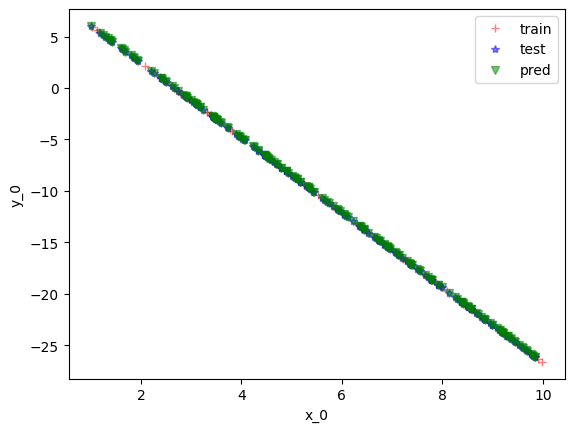

True parameters: w_true=[[-3.6419794]], b_true=[9.70881432]
Learned parameters: w=[[-3.64182107]], b=[9.70822198]
The distance between w_true and w: 0.00015832581813235436
The distance between b_true and b: 0.0005923411398285339
The distance between y_pred and y_test: 0.0071469605749705685


num_features = 10, num_targets = 1
[[-0.78139322]
 [ 2.14122157]
 [-2.43795611]
 [ 0.35913202]
 [-1.96854294]
 [-4.5067602 ]
 [-1.97020313]
 [ 1.17463693]
 [ 1.77064876]
 [-3.64407981]
 [ 1.36715425]] [[-0.78139322]
 [ 2.14122157]
 [-2.43795611]
 [ 0.35913202]
 [-1.96854294]
 [-4.5067602 ]
 [-1.97020313]
 [ 1.17463693]
 [ 1.77064876]
 [-3.64407981]] [1.36715425] 100 10 1
(200, 10) (10, 1)


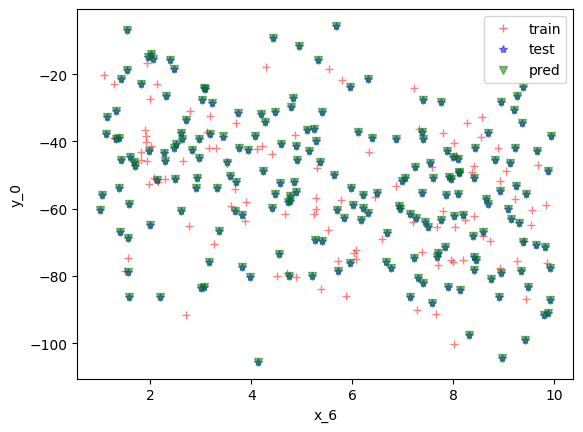

True parameters: w_true=[[-0.78200999]
 [ 2.14147927]
 [-2.43778222]
 [ 0.35920172]
 [-1.9679491 ]
 [-4.50713098]
 [-1.96984319]
 [ 1.1750565 ]
 [ 1.77029447]
 [-3.64407233]], b_true=[1.36406472]
Learned parameters: w=[[-0.78139322]
 [ 2.14122157]
 [-2.43795611]
 [ 0.35913202]
 [-1.96854294]
 [-4.5067602 ]
 [-1.97020313]
 [ 1.17463693]
 [ 1.77064876]
 [-3.64407981]], b=[1.36715425]
The distance between w_true and w: 0.0011845623695266726
The distance between b_true and b: 0.003089532474701784
The distance between y_pred and y_test: 0.04211913813557216


num_features = 10, num_targets = 10
[[ 1.34142229e+00  4.25247146e+00 -4.21400392e+00  4.13404761e+00
  -4.08988147e+00 -1.56340077e+00  2.85642853e+00 -2.53772107e+00
  -2.36913827e+00 -4.48976727e+00]
 [-1.48617417e+00 -7.51747767e-01  3.21686804e+00 -4.11563677e+00
   3.65316963e+00 -6.41213311e-01 -1.85558792e+00 -3.77023089e-01
   2.06228502e+00 -3.50965215e+00]
 [ 1.19706222e+00 -4.69667707e+00  3.29702455e+00  1.71150570e+00
   3

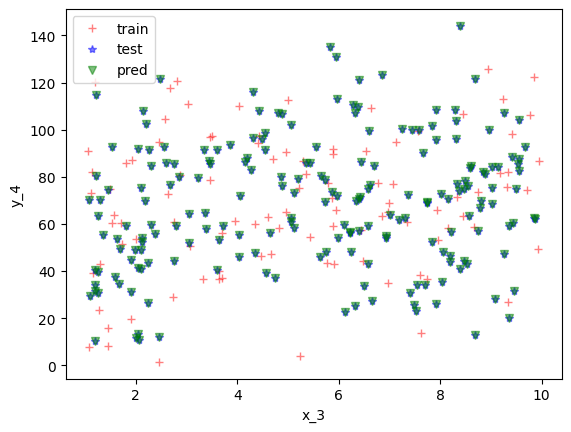

True parameters: w_true=[[ 1.34115245  4.25242834 -4.21413967  4.13413221 -4.090713   -1.5632624
   2.85623117 -2.53746095 -2.36898353 -4.48942854]
 [-1.48640097 -0.75057162  3.21665879 -4.11573001  3.65308208 -0.64083649
  -1.85653181 -0.37751978  2.06202307 -3.50998001]
 [ 1.19700692 -4.69695694  3.29653363  1.71157318  3.35726907 -1.62687683
   0.94740279 -1.53804579  0.42270003  4.2840413 ]
 [ 2.30333398  4.34396954 -1.26543077 -4.40846241  1.5183139   4.87126513
   2.45729289 -2.93545719 -4.77415979  1.43478389]
 [ 4.2717811  -3.82643275 -4.59491953  3.80389512  2.95746182 -1.74214155
   4.92682425  2.17021267  3.75392102 -3.74133493]
 [ 2.09584934  0.2805606   4.67966475  0.04999984 -0.07331042  2.68272948
  -1.05553946 -1.0438587   1.05914285  0.78514335]
 [-0.46819606  4.15813492 -1.08376619  4.33085513 -4.01307165 -0.81638898
   3.22581928 -4.23935062  0.26317289 -0.01510827]
 [ 4.01301352 -0.33334268 -0.9494051  -1.96636922  3.58236845  1.87012506
   3.63234493  1.03054064 -2

In [5]:
noise_level = 0.01
for i, (num_features, num_targets) in enumerate([(1, 1), (10, 1), (10, 10)]):
    print(f'num_features = {num_features}, num_targets = {num_targets}')
    # generate evaluation dataset
    (x_train, y_train), (x_test, y_test), (w_true, b_true) = generate_evaluation_data(num_features, num_targets, noise_level)

    # Use x_train and y_train as training data to fit your model;
    # then calculate the prediction y_pred for x_test
    w, b = linear_regression_params(x_train, y_train)
    y_pred = linear_regression_predict(w, b, x_test)

    # visualize the results
    i = np.random.choice(num_features) # if there are multiple predictors (features), randomly select one to plot as x
    j = np.random.choice(num_targets) # if there are multiple targets
    plt.plot(x_train[:, i], y_train[:, j], 'r+', label='train', alpha=0.5)
    plt.plot(x_test[:, i], y_test[:, j], 'b*', label='test', alpha=0.5)
    plt.plot(x_test[:, i], y_pred[:, j], 'gv', label='pred', alpha=0.5)
    plt.xlabel(f'x_{i}')
    plt.ylabel(f'y_{j}')
    plt.legend()
    plt.show()
    # print result summary
    print(f'True parameters: w_true={w_true}, b_true={b_true}')
    print(f'Learned parameters: w={w}, b={b}')
    print(f'The distance between w_true and w: {np.linalg.norm(w_true - w)}')
    print(f'The distance between b_true and b: {np.linalg.norm(b_true - b)}')
    print(f'The distance between y_pred and y_test: {np.linalg.norm(y_test - y_pred)}\n\n')